# Задача 2. Метод центрального пути

Пусть дана задача ЛП в канонической форме.

$$
max\ c^Tx \\
Ax+ x_s = b \\
x, x_s \geq 0 \\
x \in \mathbb{R}^n, b \in \mathbb{R}^m, \\
A - матрица \ размера \ m\times n, \\
y \in \mathbb{R}^m,  y_s \in \mathbb{R}^n - переменные \ двойственной \ задачи
$$
Методом центрального пути называется следующий алгоритм. (Linear Programming  Robert J. Vanderbei, стр. 277)


$$
X \stackrel{\Delta}{=} diag(x) \ \ X_s \stackrel{\Delta}{=} diag(x_s) \\ Y \stackrel{\Delta}{=} diag(y) \ \ Y_s \stackrel{\Delta}{=} diag(y_s)
$$

$$
F(x, x_s, y, y_s, \mu) \stackrel{\Delta}{=} \left[\begin{array}{cc}  
Ax + x_s - b \\
A^Ty - y_s- c \\
XY_se - \mu e \\
YX_se - \mu e
\end{array}\right]
$$

$$
\mu, \epsilon_1, \epsilon_2, \epsilon_3, \epsilon_4 > 0 \\ 
(x, x_s, y, y_s) = solve(F(x, x_s, y, y_s, \mu_0) = 0)
$$

Задание:
1. Показать, что, если алгоритм сходится, то он сходится к решения задачи ЛП $(x^k,x^k_s, y^k, y^k_s) \rightarrow(x^*, x_s^*, y^*, y_s^*)$ при $\mu \rightarrow 0$.

2. Реализовать алгоритм демпфированного метода Ньютона (варьируемая длина шага) для задачи 
$$
solve(F(x, x_s, y, y_s) = 0)
$$ Как выбрать демпфирующий параметр метода, для того чтобы гарантировать, что полученные решения будут неотрицательными?
3. Показать экспериментально, что с помощью построенного алгоритма можно решить задачи ЛП. Привести в отчете все входные данные, которые использовались для тестирования. Выберите ограниченную задачу оптимизации с двумя основными переменными (n=2). Решите эту задачу графическим или симплекс методом. Изобразите на плоскости $(x_1, x_2)$ допустимое множество и решение $(x_1^*, x_2^*)$ задачи. Отметьте на том же рисунки последовательность точек $(x_1^k, x_2^k)$ и соответствующие значения.
4. Сформулируйте условие выхода, которое позволяет детектировать неограниченность задачи. Покажите экспериментально, что условие работает.


##  Решение:

### Часть 1. Сходимость к решению задачи ЛП.

Покажем сначала, если последовательность $(x^k, x_s^k, y^k, y_s^k)$ построенная алгоритмом сходится, то она сходится к решению задачи ЛП $(x^*, x_s^*, y^*, y_s^*)$ при $\mu \rightarrow 0$.  
  
Исходная задача Л.П. формулируется как:  
$$
c^Tx \rightarrow max \\
Ax + x_s = b \\
x, x_s \ge 0  \\
$$
В таком случае, двойственная задача будет иметь вид:  
$$
b^Ty \rightarrow min \\
A^Ty - y_s = c \\
y, y_s \ge 0 \\
$$
  
Согласно алгоритму имеем (поскольку на каждом шаге ищем решение уравнения $F = 0$):  
$$
x_s = b - Ax  \\
y_s = A^Ty - c
$$  

$XY_se = \mu e \implies (x_1y_{s1}, ..., x_ny_{sn})^T = (\mu, ..., \mu)^T \implies y_s^Tx = \mu n$  
$YX_se = \mu e \implies (y_1x_{s1}, ..., y_nx_{sm})^T = (\mu, ..., \mu)^T \implies y^Tx_s = \mu m$  
Следовательно: 
$$
y_s^Tx + y^Tx_s = (A^Ty - c)^Tx + y^T(b - Ax) = y^TAx - c^Tx + y^Tb - y^TAx = y^Tb - c^Tx = \mu(n+m) \rightarrow 0
$$
Что значит, что разность решений исходной и двойственной задач, то есть $(y^Tb - c^Tx)$ стремится к 0, что в свою очередь означает, что каждое из них сходится к истинному решению задачи ЛП.

###  Часть 2. Реализация алгоритма.

Функция F:
$$
F(x, x_s, y, y_s) = 
\begin{bmatrix}
Ax + x_s - b \\
A^Ty -y_s -c \\
XY_se - \mu e \\
YX_se - \mu e
\end{bmatrix} = 0
$$ где $e = (1, ..., 1)^T$ необходимой размерности (обозначение), $\mu$ - параметр.  
Обозначим 
$$\xi = 
\begin{bmatrix}
x \\
x_s \\
y \\
y_s
\end{bmatrix}
$$
Чтобы решить уравнение $F = 0$ используем демпфирующий метод Ньютона. Для этого вычислим производную:  
 
$$
\nabla F(\xi) = 
\begin{bmatrix}
A & I_m & 0 & 0 \\
0 & 0 & A^T & -I_n \\
Y_s & 0 & 0 & X \\
0 & Y & X_s & 0
\end{bmatrix}
$$


Шаг метода Ньютона как мы знаем: $\xi_{k+1} = \xi_k - \lambda(\nabla F(\xi_k))^{-1}F(\xi_k)$, где $\lambda$ - демпфирующуй параметр.  
  
Необходимо выбрать $\lambda$ так, чтобы на каждом шаге выполнялось условие, что $x, x_s, y, y_s > 0$ (необходимо строгое неравенство, чтобы для каждого $\mu > 0$ уравнение $x_iy_{s_j} = \mu$ и $y_kx_{s_l} = \mu$ имело решение):  Введем обозначение:  
$$
\Delta \xi = 
\begin{bmatrix}
\Delta x \\
\Delta x_s \\
\Delta y \\
\Delta y_s
\end{bmatrix}
= (\nabla F(\xi_k))^{-1}F(\xi_k)
$$ 
Тогда если мы хотим, чтобы были выполнены нестрогие неравенства $x^{k+1}, x_s^{k+1}, y^{k+1}, y_s^{k+1} \ge 0$, то необходимо, чтобы  
$$
\begin{bmatrix}
x^k - \lambda \Delta x \\
x_s^k - \lambda \Delta x_s \\
y^k - \lambda \Delta y \\
y_s^k - \lambda \Delta y_s
\end{bmatrix}
\ge 0
$$, тогда получаем, что $\frac {1}{\lambda} \ge max \Big\{ \frac{\Delta x_i}{x^k_i}, \frac{\Delta {x_s}_j}{{x_s^k}_j}, \frac{\Delta y_l}{y^k_l}, \frac{\Delta {y_s}_t}{{y_s^k}_t} \Big\}$  
Следовательно для того, что выполнить строгое неравенство будем домножать шаг, например, на 0.99. В таком случае  формула для демпфирующего параметра выглядит следующим образом:  
$$
\lambda = r \cdot \Bigg( max \Big\{ \frac{\Delta x_i}{x^k_i}, \frac{\Delta {x_s}_j}{{x_s^k}_j}, \frac{\Delta y_l}{y^k_l}, \frac{\Delta {y_s}_t}{{y_s^k}_t} \Big\} \Bigg)^{-1}
$$, где r = 0.99. Если $\lambda$ оказалось $< 0$, то это означает, что все $\Delta$ меньше 0, и тогда просто выберем $\lambda = 1$. Если $\lambda$ оказалось $> 1$ то сделаем его $= 1$.  

#### Условие неогранниченности задачи.

В следующем случае считаем что задача неогранничена:  
Пусть C - достаточно большая константа например $10^{15}$. Тогда будем считать, что если $\|x\| > C$, то  исходная задача не ограничена, если $\| y \| > C$, то неограничена двойственная задача.

Код для алгоритма:

In [1]:
import numpy as np
from numpy import linalg as LA
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2', style='whitegrid', font_scale=1.4)
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

In [2]:
def evaluate_grad_F(A, x, xs, y, ys):
    n, m = len(x), len(xs)
 
    L1 = np.hstack(( A, np.eye(m), np.zeros((m, m)), np.zeros((m, n)) ))
    L2 = np.hstack(( np.zeros((n, n)), np.zeros((n, m)), A.T, -np.eye(n) ))
    L3 = np.hstack((
        np.diag(ys.flatten()), np.zeros((n, m)), np.zeros((n, m)), 
        np.diag(x.flatten())
    ))
    L4 = np.hstack((
        np.zeros((m, n)), np.diag(y.flatten()), np.diag(xs.flatten()), 
        np.zeros((m, n))
    ))
    return np.vstack((L1, L2, L3, L4))

In [3]:
def evaluate_F(c, A, b, x, xs, y, ys, mu):
    n, m = len(x), len(xs)
    
    e_n = np.ones(n)[:, np.newaxis]
    e_m = np.ones(m)[:, np.newaxis]
    
    F1 = (A @ x) + xs - b
    F2 = (A.T @ y) - ys - c
    F3 = (np.diag(x.ravel()) @ np.diag(ys.ravel()) @ e_n) - mu * e_n
    F4 = (np.diag(y.ravel()) @ np.diag(xs.ravel()) @ e_m) - mu * e_m
    
    F = np.vstack((F1, F2, F3, F4))
    return F

In [4]:
def choose_lambda(lambda_, r):
    if lambda_ <= 0:
        lambda_ = 1
    else:
        lambda_ = r * (1 / lambda_)
        if lambda_ > 1:
            lambda_ = 1
    return lambda_

def update_sequence(xi, n, m):
    return xi[0:n], xi[n:n+m], xi[n+m:n+2*m], xi[n+2*m:2*(n+m)]

def newton_method(c, A, b, mu, eps):
    n, m = len(c), len(b)
    C, r = 1e15, 0.99
    
    xi = np.ones(2 * (n + m))[:, np.newaxis] * 1
    
    while True:
        x, xs, y, ys = update_sequence(xi, n, m)
        
        if LA.norm(x) > C  or LA.norm(y) > C:
            return 'unbounded'
        
        grad = evaluate_grad_F(A, x, xs, y, ys)
        F = evaluate_F(c, A, b, x, xs, y, ys, mu)
        dxi = np.linalg.inv(grad) @ F
        
        lambda_ = choose_lambda((dxi / xi).max(), r)

        xi_old = xi.copy()
        xi = xi - lambda_ * dxi
        
        if LA.norm(xi - xi_old) < eps:
            break
    return xi

In [5]:
def central_path_algorithm(c, A, b, mu=1, eps=np.ones(4)*0.01, k_max=10_000,
                           get_sequence=False):
    n, m = len(c), len(b)
    
    if get_sequence:
        sequence = []
    
    mu, k = 1, 0
    while True:
        k = k + 1
        
        if k > 1:
            xi_old = xi.copy()
        xi = newton_method(c, A, b, mu, eps.min())
        
        if xi == 'unbounded':
            return 'unbounded'
        
        x, xs, y, ys = update_sequence(xi, n, m)
        
        if get_sequence:
            sequence.append(((x, xs, y, ys), mu))
        
        mu = 0.1 * mu
        
        if k > 1:
            x_old, xs_old, y_old, ys_old = update_sequence(xi_old, n, m)
            norms = np.vectorize(LA.norm)(np.array([x - x_old, xs - xs_old, y - y_old, ys - ys_old]))
            if all(norms < eps) or k == k_max:
                break
    
    x, xs, y, ys = update_sequence(xi, n, m)
    
    return (sequence if get_sequence else (x, xs, y, ys))

## Проверка

Тестировать реализацию будем на следующем примере:  
$$
f(x)=x_1 + x_2 \rightarrow max \\
-x_1 + 3x_2 \le 2 \\
5x_1 + 3x_2 \le 6 \\
4x_1 - x_2 \le 4 \\
$$  

In [6]:
A = np.array([
    [-1, 3],
    [5, 3],
    [4, -1]
])
c = np.array([[1], [1]])
b = np.array([[2], [6], [4]])

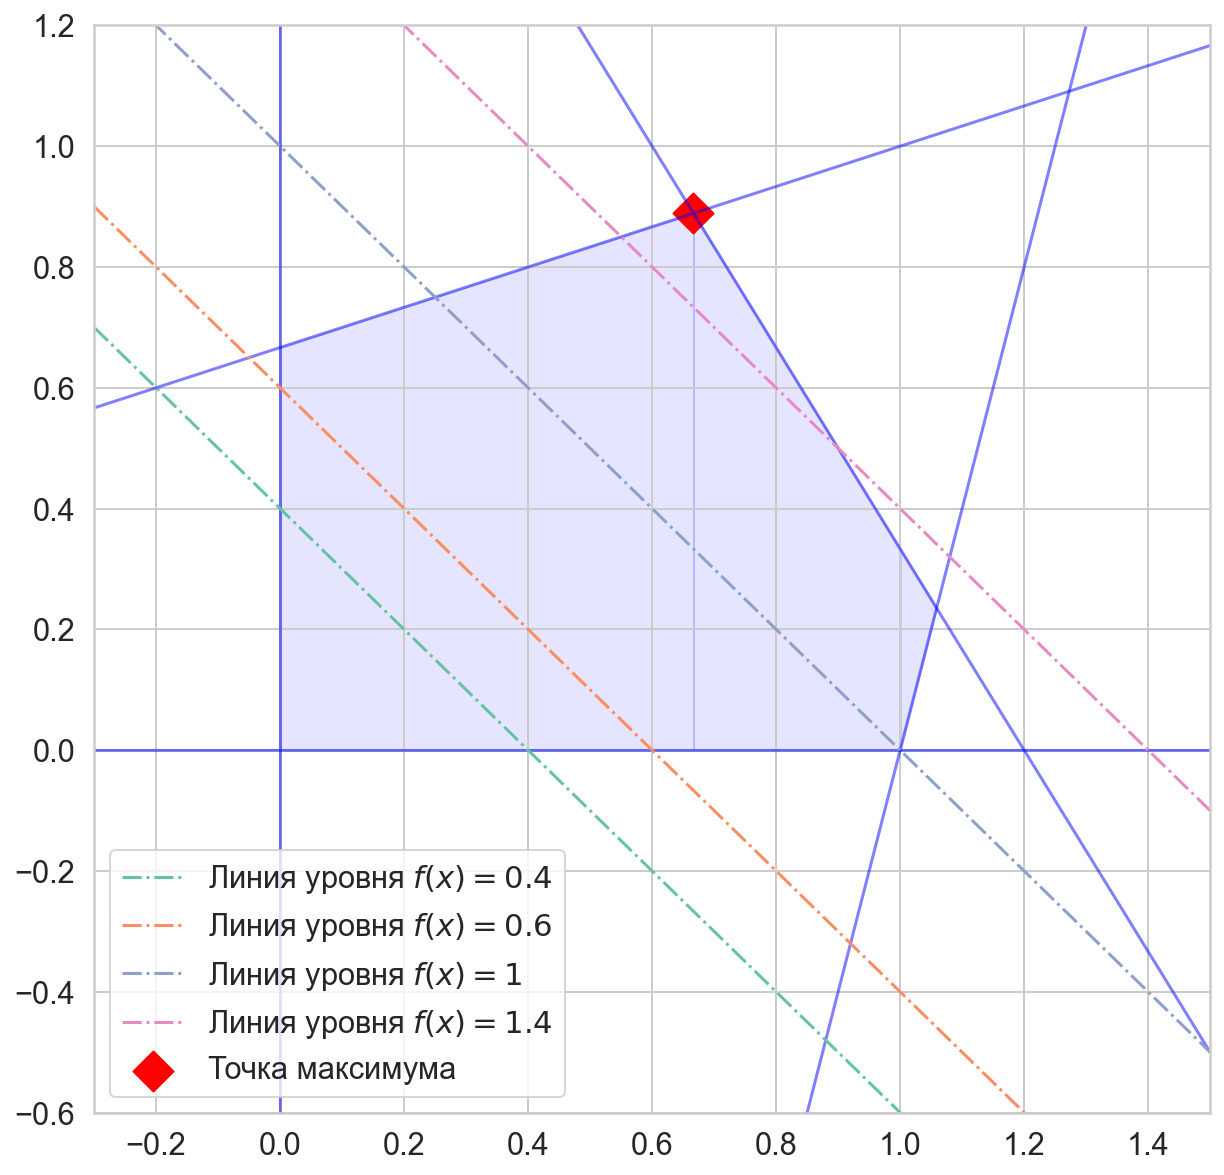

In [7]:
plt.figure(figsize=(10, 10))

grid = np.linspace(-0.3, 1.5, 200)

for i, a in enumerate(A):
    cur_y = (b[i][0] - a[0] * grid) / a[1]
    plt.plot(grid, cur_y, color='blue', alpha=0.5)


plt.axvline(x=0, ymin=0, ymax=10, color='blue', alpha=0.5)
plt.axhline(y=0, xmin=0, xmax=10, color='blue', alpha=0.5)

levels = [0.4, 0.6, 1, 1.4]
for j, level in enumerate(levels):
    plt.plot(grid, (level - c[0] * grid) / c[1], ls='-.', label=f'Линия уровня $f(x)={level}$')

plt.scatter([2/3], [8/9], marker='D', s=200, color='red', 
            label='Точка максимума')

px = [0, 2/3, 1, 18/17]
upper_a = [A[0], A[1], A[1]]
upper_b = [b[0][0], b[1][0], b[1][0]]
lower_a = [[0, 1], [0, 1], A[2]]
lower_b = [0, 0, b[2][0]]
for i in range(3):
    grid = np.linspace(px[i], px[i + 1], 200)
    plt.fill_between(
        grid,
        (lower_b[i] - lower_a[i][0] * grid) / lower_a[i][1],
        (upper_b[i] - upper_a[i][0] * grid) / upper_a[i][1],
        color='blue', alpha=0.1, zorder=-1
    )

plt.ylim((-0.6, 1.2))
plt.xlim((-0.3, 1.5))
plt.legend(loc='best')
plt.show()

Несложно понять, что максимум функции $f(x)$ достигается в точке $\mathbf{x} = (\frac{2}{3}, \frac{8}{9})$, которая будет точкой пересечения прямых $-x + 3y = 2$ и $5x + 3y = 6$.

In [8]:
result = central_path_algorithm(c, A, b, get_sequence=True)

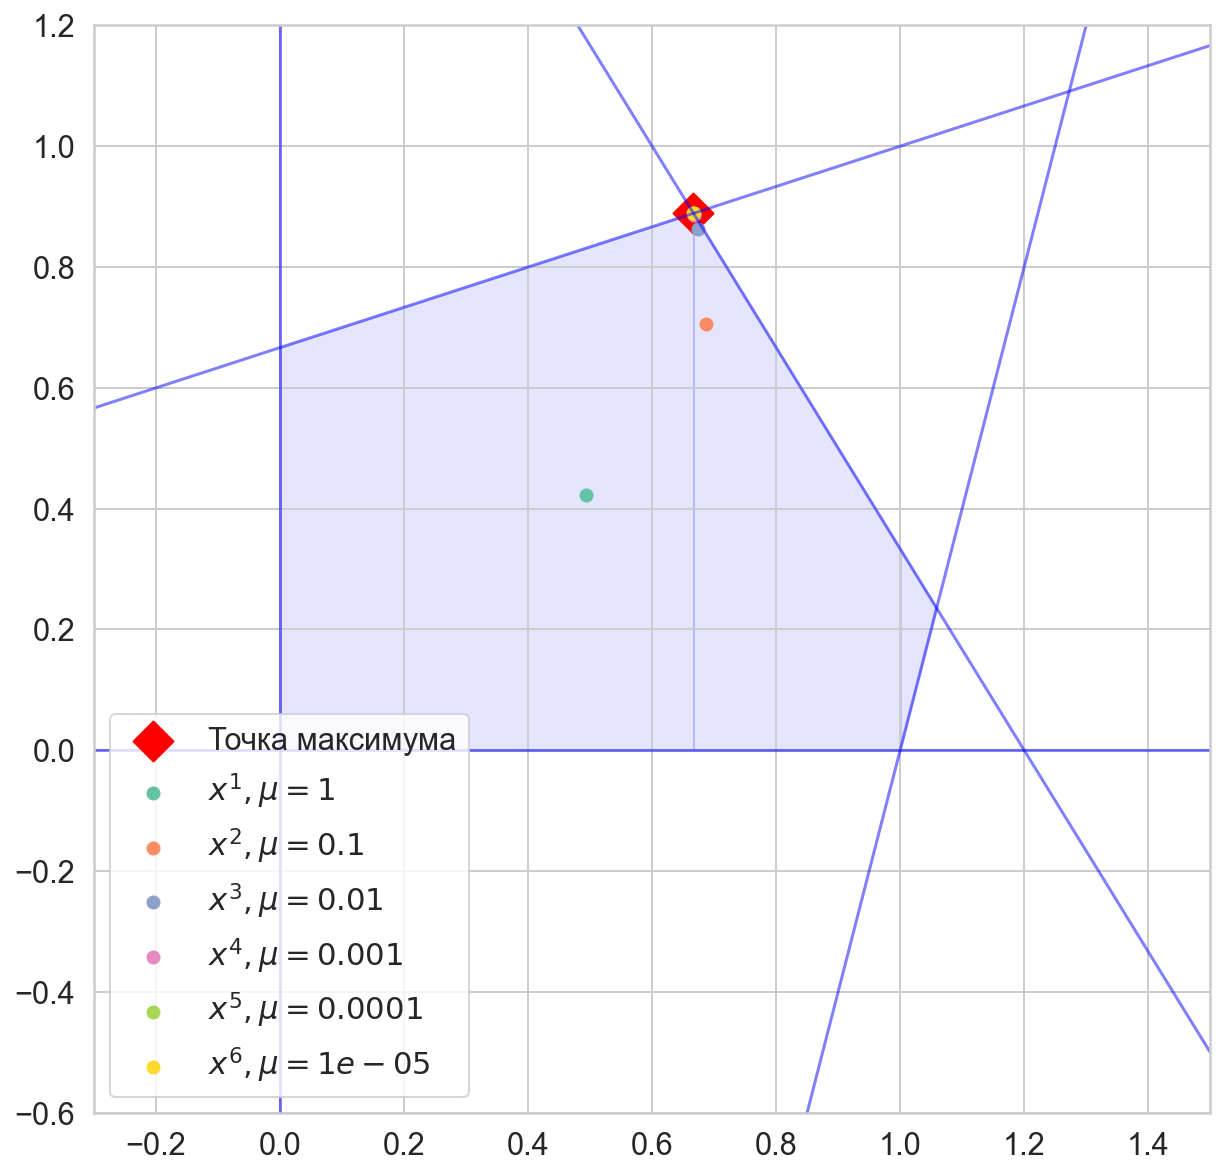

In [9]:
plt.figure(figsize=(10, 10))

grid = np.linspace(-0.3, 1.5, 200)


for i, a in enumerate(A):
    cur_y = (b[i][0] - a[0] * grid) / a[1]
    plt.plot(grid, cur_y, color='blue', alpha=0.5)


plt.axvline(x=0, ymin=0, ymax=10, color='blue', alpha=0.5)
plt.axhline(y=0, xmin=0, xmax=10, color='blue', alpha=0.5)


plt.scatter([2/3], [8/9], marker='D', s=200, color='red', 
            label='Точка максимума')

px = [0, 2/3, 1, 18/17]
upper_a = [A[0], A[1], A[1]]
upper_b = [b[0][0], b[1][0], b[1][0]]
lower_a = [[0, 1], [0, 1], A[2]]
lower_b = [0, 0, b[2][0]]
for i in range(3):
    grid = np.linspace(px[i], px[i + 1], 200)
    plt.fill_between(
        grid,
        (lower_b[i] - lower_a[i][0] * grid) / lower_a[i][1],
        (upper_b[i] - upper_a[i][0] * grid) / upper_a[i][1],
        color='blue', alpha=0.1, zorder=-1
    )

for i, tpl in enumerate(result):
    p, mu = tpl
    plt.scatter([p[0][0]], [p[0][1]], label=r'$'+fr'x^{i+1}, \mu={np.round(mu, 5)}'+r'$')

plt.ylim((-0.6, 1.2))
plt.xlim((-0.3, 1.5))
plt.legend(loc='best')
plt.show()

## Проверка условия неогранниченности

Проверим условие неограниченности. Пример задачи решение которой не ограничено:  
$$
f(x)=x_1 + x_2 \rightarrow max \\
-x_1 + 3x_2 \le 2 \\
$$

In [10]:
A = np.array([
    [-1, 3]
])
c = np.array([[1], [1]])
b = np.array([[2]])

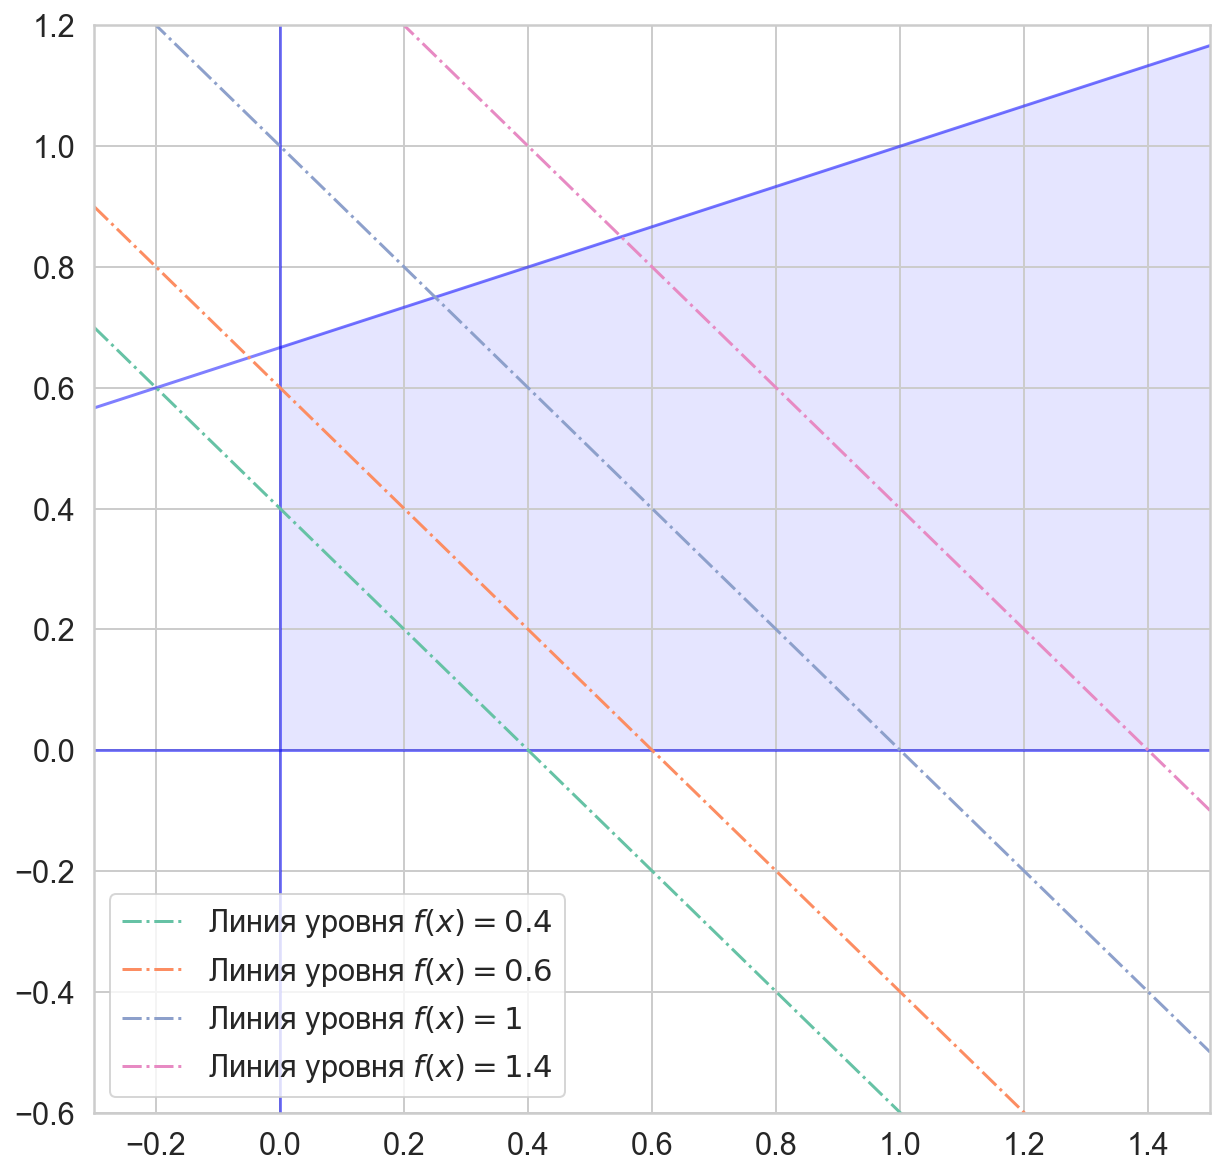

In [11]:
plt.figure(figsize=(10, 10))

grid = np.linspace(-0.3, 1.5, 200)


for i, a in enumerate(A):
    cur_y = (b[i][0] - a[0] * grid) / a[1]
    plt.plot(grid, cur_y, color='blue', alpha=0.5)

plt.axvline(x=0, ymin=0, ymax=10, color='blue', alpha=0.5)
plt.axhline(y=0, xmin=0, xmax=10, color='blue', alpha=0.5)


levels = [0.4, 0.6, 1, 1.4]
for j, level in enumerate(levels):
    plt.plot(grid, (level - c[0] * grid) / c[1], ls='-.',
             label=f'Линия уровня $f(x)={level}$')

px = [0, 5]
upper_a = A
upper_b = b
lower_a = [[0, 1]]
lower_b = [0]
grid = np.linspace(px[0], px[1], 200)
plt.fill_between(
    grid,
    (lower_b[i] - lower_a[i][0] * grid) / lower_a[i][1],
    (upper_b[i] - upper_a[i][0] * grid) / upper_a[i][1],
    color='blue', alpha=0.1, zorder=-1
)

plt.ylim((-0.6, 1.2))
plt.xlim((-0.3, 1.5))
plt.legend(loc='best')
plt.show()

In [12]:
central_path_algorithm(c, A, b)

'unbounded'

Как видим наш алгоритм действительно корректно обнаруживает, что данная задача неогранничена.